# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [3]:
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# IMPORTING DATASET

In [4]:
data = pd.read_excel('Airlines+Data.xlsx',index_col=0, parse_dates= ['Month'])

In [5]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [7]:
data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

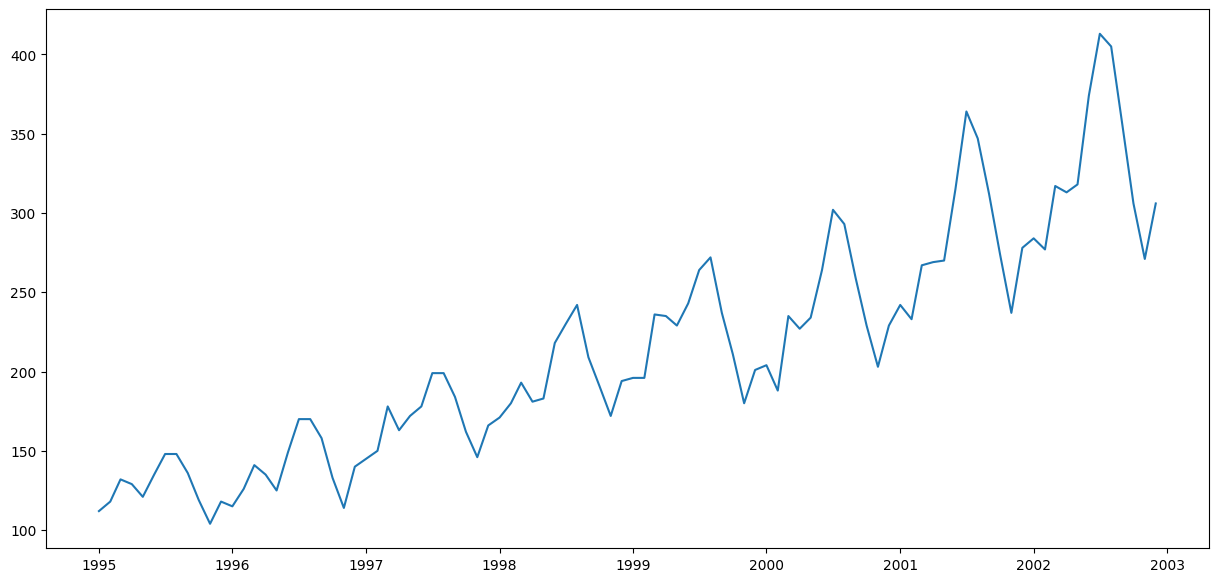

In [8]:
plt.figure(figsize = (15,7))
plt.plot(data)

In [9]:
data = pd.read_excel("Airlines+Data.xlsx", index_col = 0, header = 0, parse_dates = True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# HISTOGRAM AND DENSITY PLOT

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

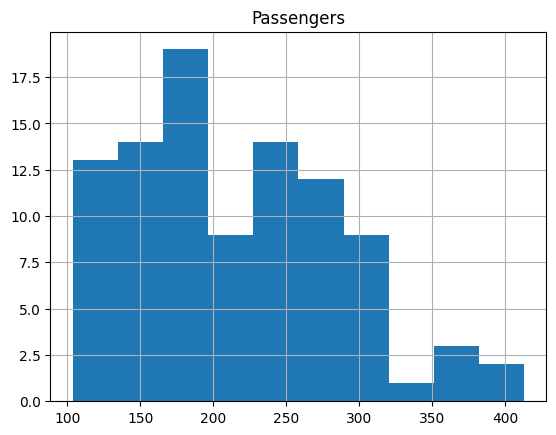

In [10]:
# create a histogram plot
data.hist()

<Axes: ylabel='Density'>

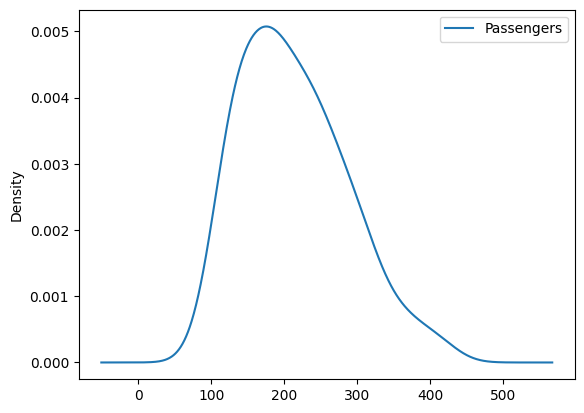

In [11]:
# create a density plot
data.plot(kind='kde')

In [12]:
data = pd.read_excel("Airlines+Data.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)

<ipython-input-12-e5cb51b95bde>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_excel("Airlines+Data.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)


In [13]:
data

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [14]:
type(data)

pandas.core.series.Series

In [15]:
# Grouping by Year
groups = data.groupby(pd.Grouper(freq='A'))
groups

In [16]:
years = pd.DataFrame()

In [17]:
for name, group in groups:
    years[name.year] = group.values

In [18]:
years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<Axes: >

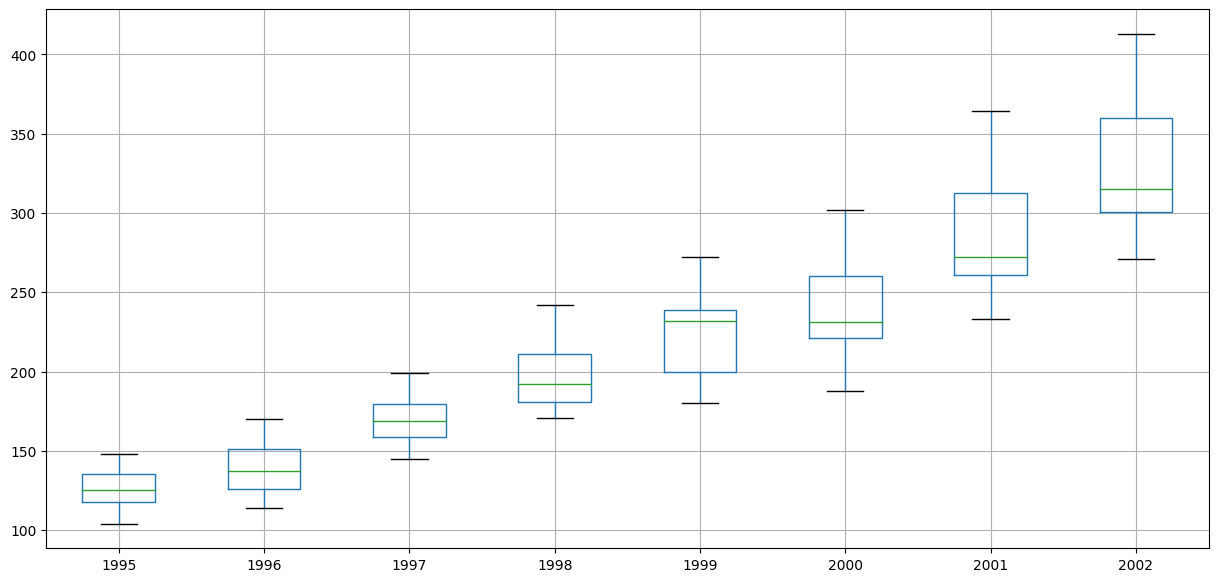

In [19]:
plt.figure(figsize = (15,7))
years.boxplot()

# LAG PLOT

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

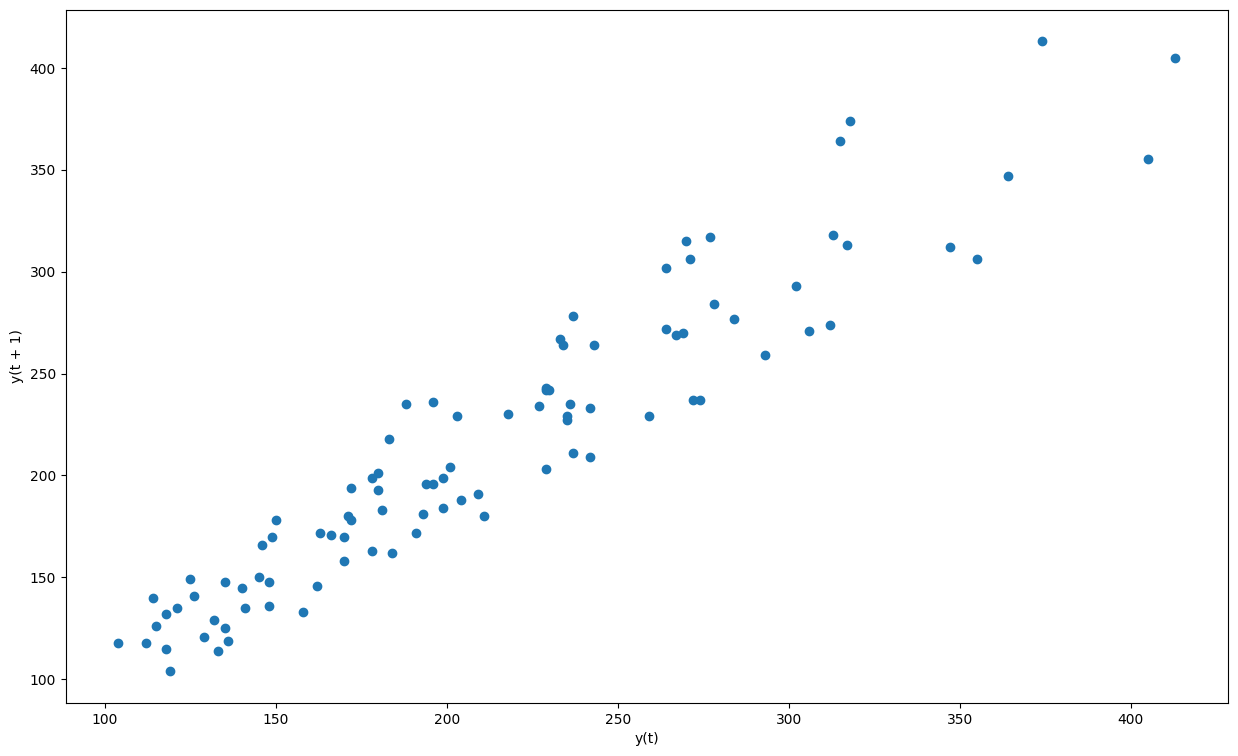

In [20]:
# create a scatter plot
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(data)

<Figure size 3200x2000 with 0 Axes>

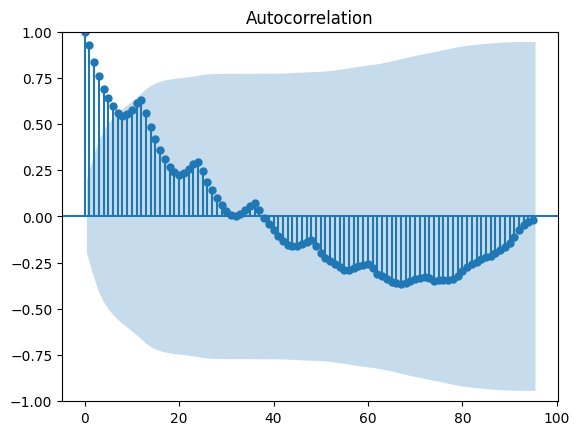

In [21]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (32,20))
plot_acf(data, lags=95)
plt.show()

# SAMPLING AND BASIC TRANSFORMATION 

In [22]:
# UPSAMPLING DATA
data = pd.read_excel("Airlines+Data.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)
data

<ipython-input-22-b7ebf318b5aa>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_excel("Airlines+Data.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [23]:
data.shape

(96,)

In [24]:
upsampled = data.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [25]:
upsampled.shape


(2892,)

Interpolate the Missing Value

In [26]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<Axes: xlabel='Month'>

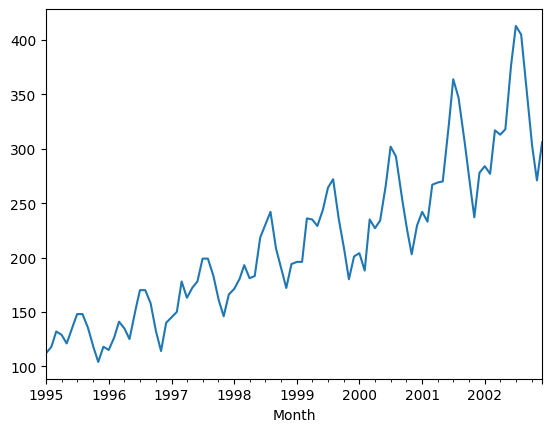

In [27]:
interpolated.plot()

<Axes: xlabel='Month'>

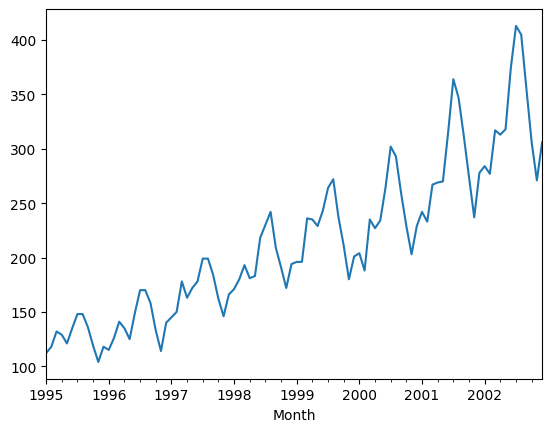

In [28]:
data.plot()

# DOWNSAMLING DATA

In [29]:
# downsample to quarterly intervals
resample = data.resample('Q')
quarterly_mean_sales = resample.mean()

<Axes: xlabel='Month'>

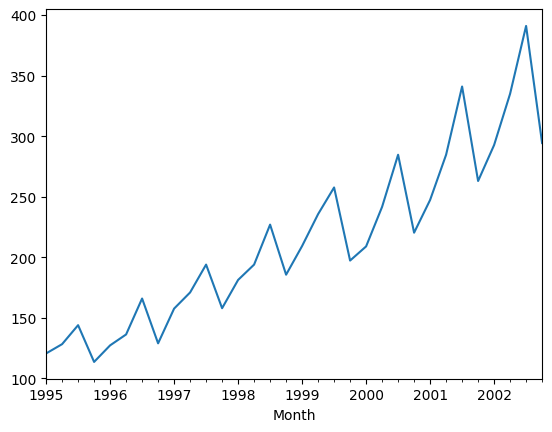

In [30]:
quarterly_mean_sales.plot()

# TRANSFORMATIONS

In [31]:
# load and plot a time series
data=pd.read_excel("Airlines+Data.xlsx",index_col=0,header=0, parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


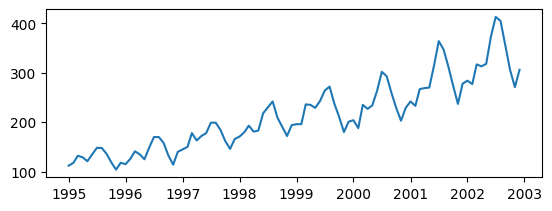

In [32]:
# line plot
plt.subplot(211)
plt.plot(data)

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

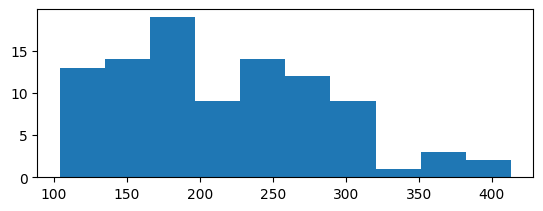

In [33]:
# histogram
plt.subplot(212)
plt.hist(data)

In [34]:
# LOG TRANSFORMATION
dataframe = pd.DataFrame(np.log(data.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


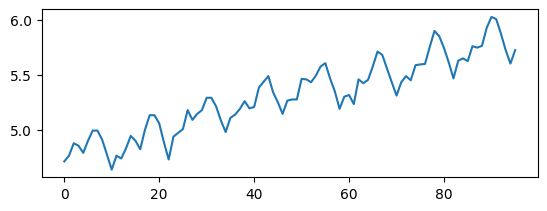

In [35]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

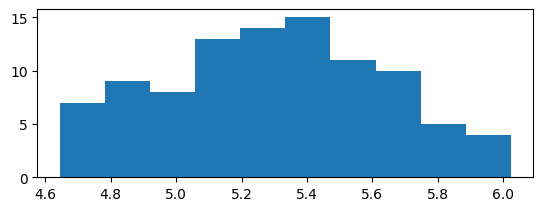

In [36]:
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [37]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

In [38]:
# SQUARE ROOT TRANSFORMATION
dataframe = pd.DataFrame(np.sqrt(data.values), columns = ['Passengers'])
dataframe

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


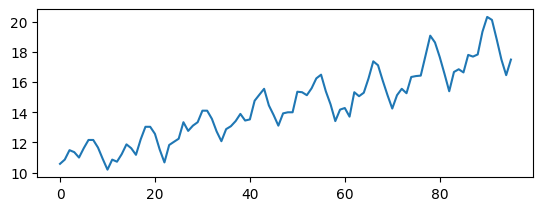

In [39]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

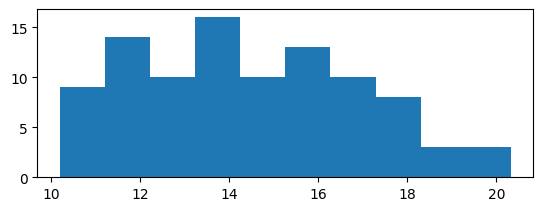

In [40]:
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

# FORECASTING - MODEL BASED METHODS

In [41]:
data=pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

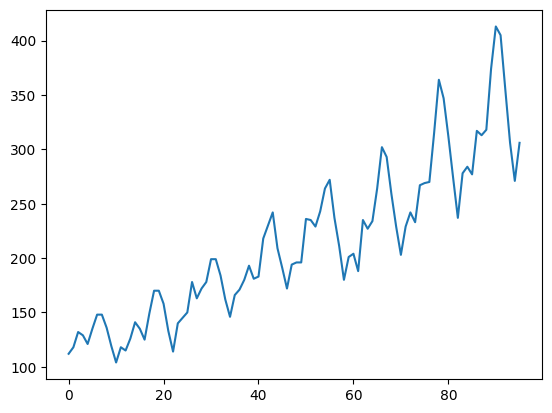

In [42]:
data['Passengers'].plot()

In [43]:
data["month"] = data['Month'].dt.strftime("%b") # month extraction
data["year"] = data['Month'].dt.strftime("%Y") # year extraction
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [44]:
mp = pd.pivot_table(data = data, values = "Passengers", index = "year", columns = "month", aggfunc = "mean", fill_value=0)
mp

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='month', ylabel='year'>

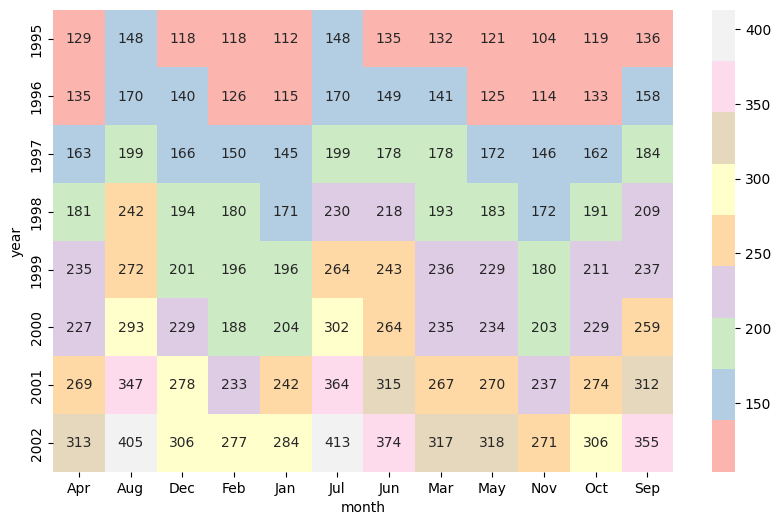

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(mp, annot=True, fmt="g", cmap = 'Pastel1') #fmt is format of the grid values

In [46]:
# Boxplot for even
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='month', ylabel='Passengers'>

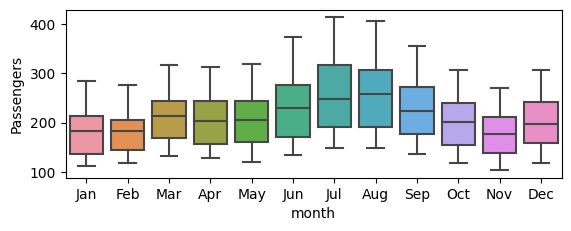

In [47]:
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)

<Axes: xlabel='year', ylabel='Passengers'>

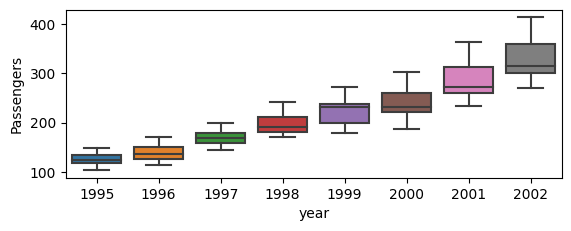

In [48]:
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

<Axes: xlabel='year', ylabel='Passengers'>

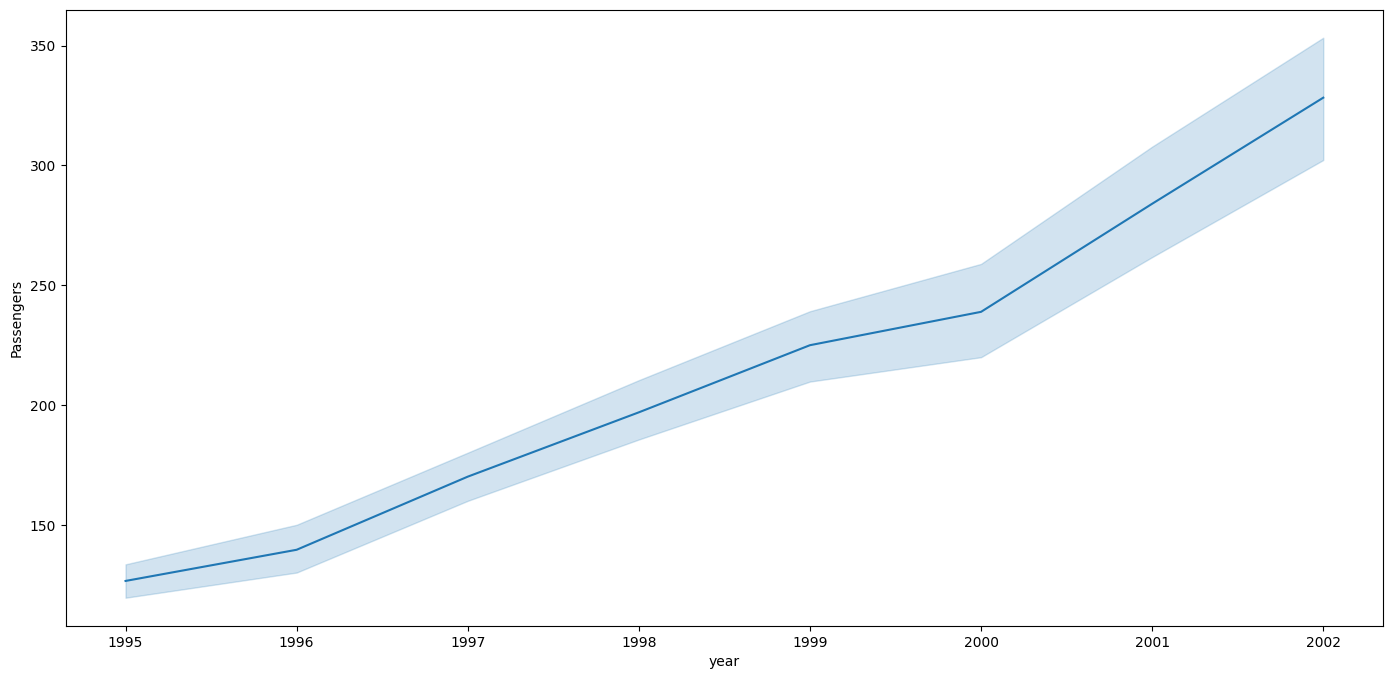

In [49]:
plt.figure(figsize=(17,8))
sns.lineplot(x="year",y="Passengers",data=data)

# SPLITTING THE DATASET

In [50]:
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [51]:
data.shape

(96, 4)

In [52]:
# Complete the dataset
data['t']=np.arange(1,97)
data['t_square']=np.square(data.t)
data['log_Passengers']=np.log(data.Passengers)
data2=pd.get_dummies(data['month'])

In [53]:
data2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
data=pd.concat([data,data2],axis=1)
data

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
# For self understanding of forecasting values data split into multiples of 12
Train = data.head(84)
Test = data.tail(12)

In [56]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
#Linear Model
import statsmodels.formula.api as smf

In [59]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480278

In [60]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315654

In [61]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [62]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.8197848142182

In [63]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612095307

In [64]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708646

In [65]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323746

In [66]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.73121052134104

In [67]:
df={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(df)

In [68]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=data).fit()
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [69]:
pred_new  = pd.Series(model_full.predict(data))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [70]:
data["Forecasted_Passengers"] = pd.Series(np.exp(pred_new))

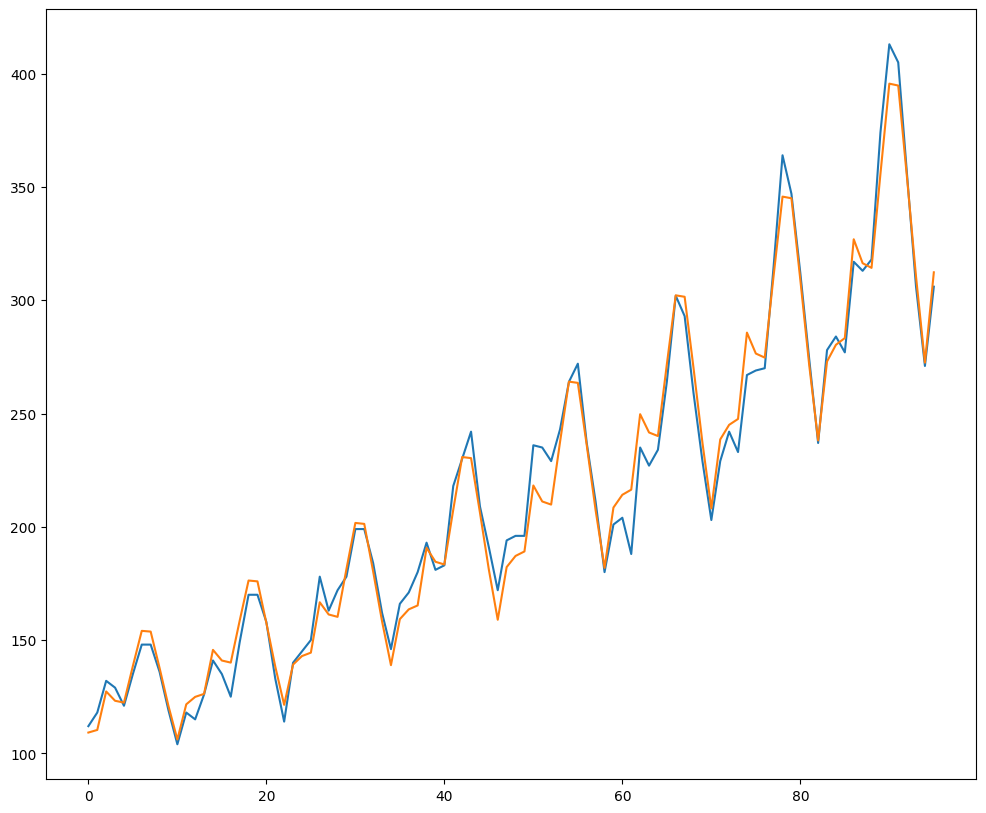

In [71]:
plt.figure(figsize=(12,10))
plt.plot(data[['Passengers','Forecasted_Passengers']].reset_index(drop=True))

# SPLITTING THE DATASET

In [72]:
data=pd.read_excel("Airlines+Data.xlsx")
Train = data.head(84)
Test = data.tail(12)

In [73]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [74]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


# MOVING AVERAGE

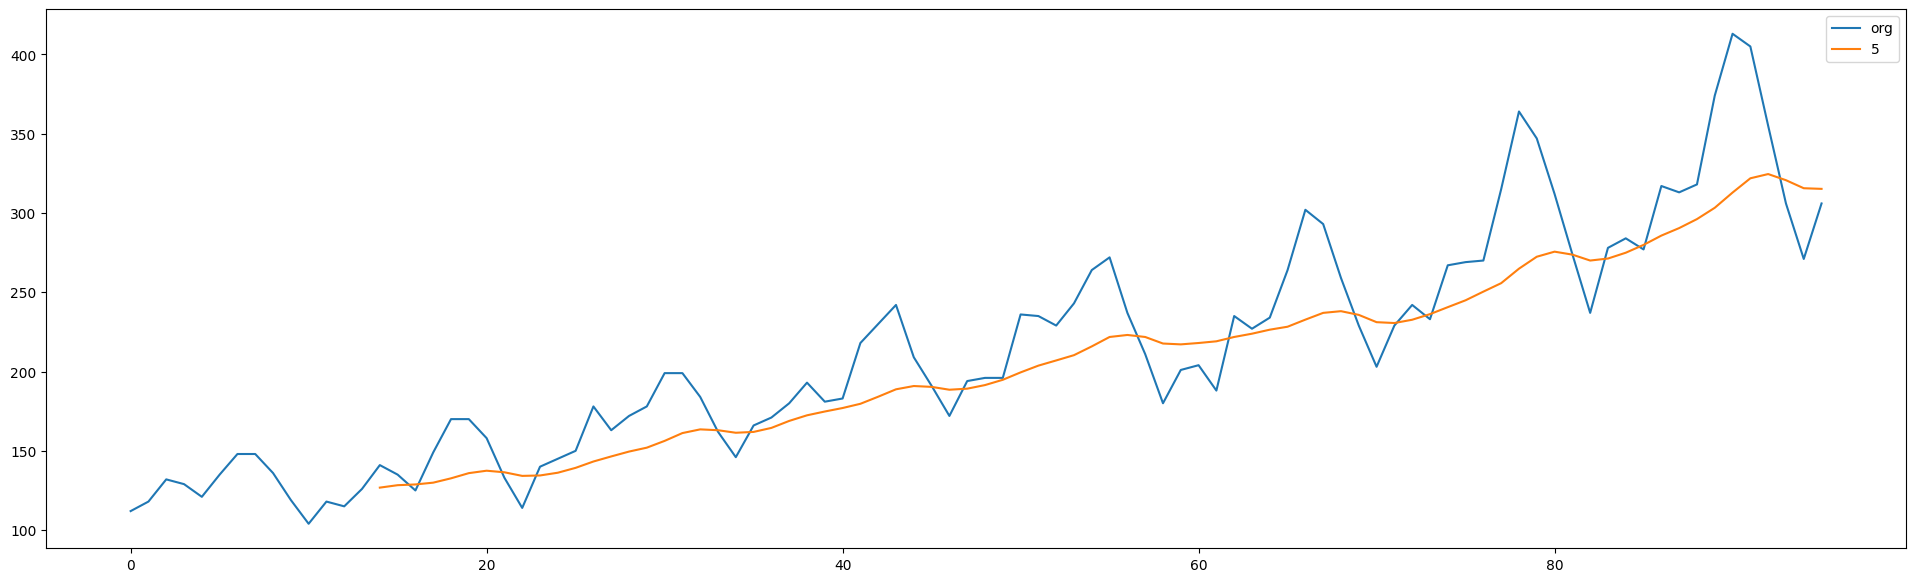

In [75]:
plt.figure(figsize=(24,7))
data['Passengers'].plot(label="org")
data["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

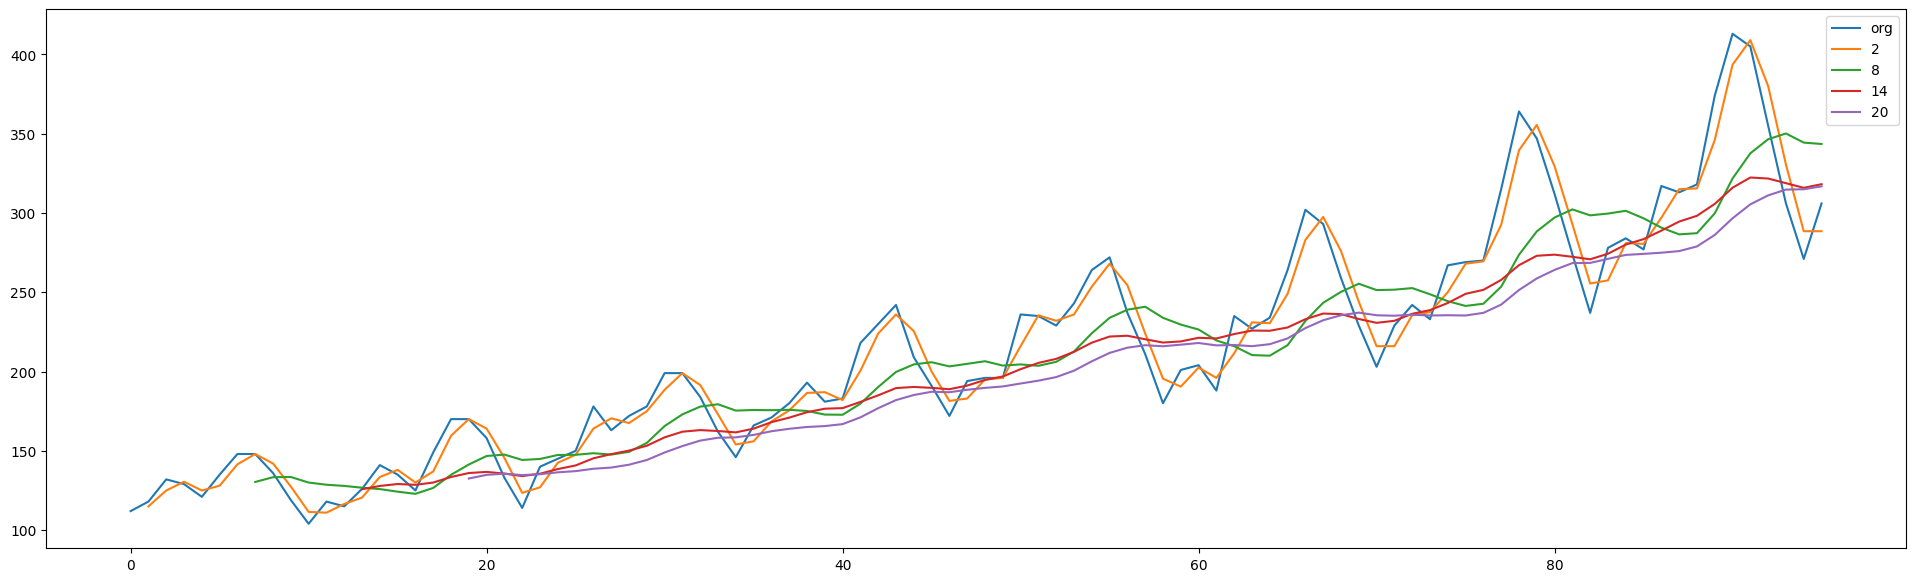

In [76]:
plt.figure(figsize=(24,7))
data['Passengers'].plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# TIME SERIES DECOMPOSITION PLOT

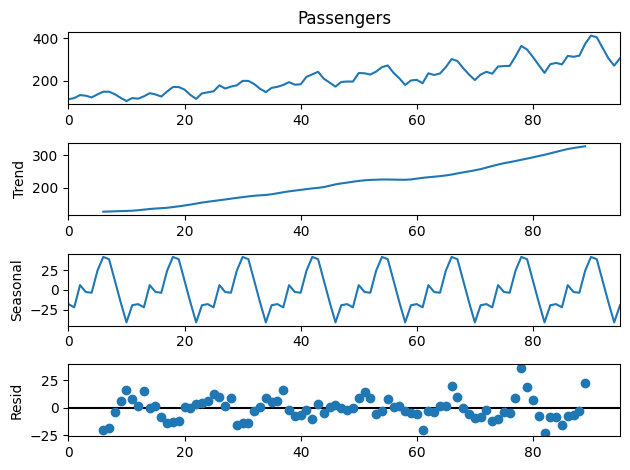

In [77]:
decompose_ts_add = seasonal_decompose(data['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

# ACF AND PACF PLOTS

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


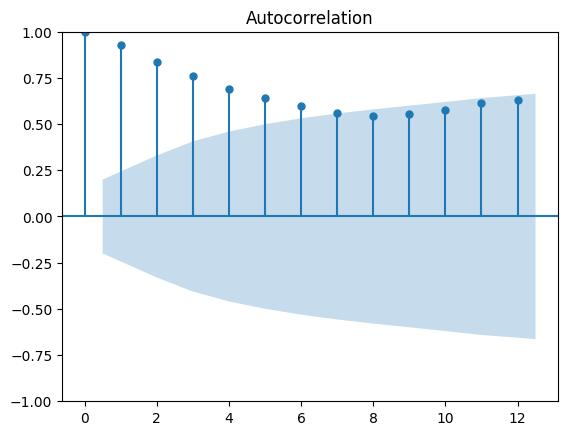

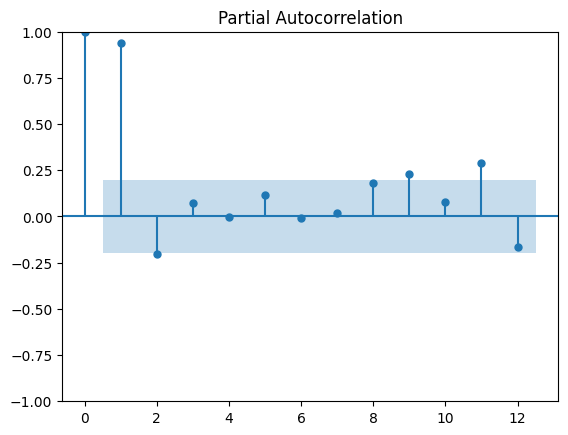

In [78]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

# EVALUATION METRIC- MAPE

In [79]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# SIMPLE EXPONENTIAL METHOD

In [80]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.411274740513823

# HOLT METHOD

In [81]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-81-1e000f8949d7>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.53071965210063

# HOLT WINTER EXPONENTIAL SMOOTHING WITH ADDITIVE SEASONALITY AND ADDITIVE TREND

In [82]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

5.730704946852847

# HOLT WINTER EXPONENTIAL SMOOTHING WITH MULTIPLICATIVE SEASONALITY AND ADDITIVE TREND

In [83]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821093186644687

# FINAL MODEL BY COMBINING TRAIN AND TEST

In [84]:
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [85]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899424
97     308.171306
98     355.532782
99     345.769814
100    345.696096
101    392.470733
102    436.501361
103    429.859243
104    380.172872
105    332.317301
106    290.625519
107    330.590176
dtype: float64

# FORECASTING USING AUTO ARIMA MODEL

In [86]:
import statsmodels.tsa.seasonal
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
data=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: xlabel='Month'>

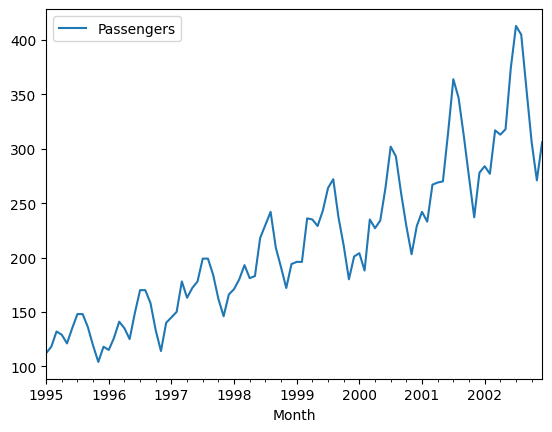

In [88]:
data.plot()

In [89]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

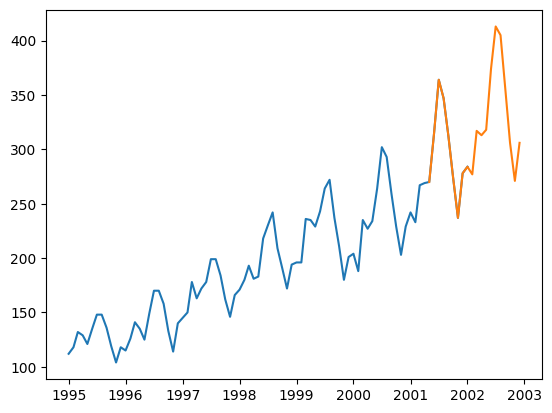

In [90]:
train = data[:85]
test = data[-20:]
plt.plot(train)
plt.plot(test)

In [91]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn',trace=True, suppress_warnings=True,stepwise=True, random_state=20,n_fits=50)
                         

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.57 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.04 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [92]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Fri, 07 Apr 2023   AIC                            537.388
Time:                                     23:58:08   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction

,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


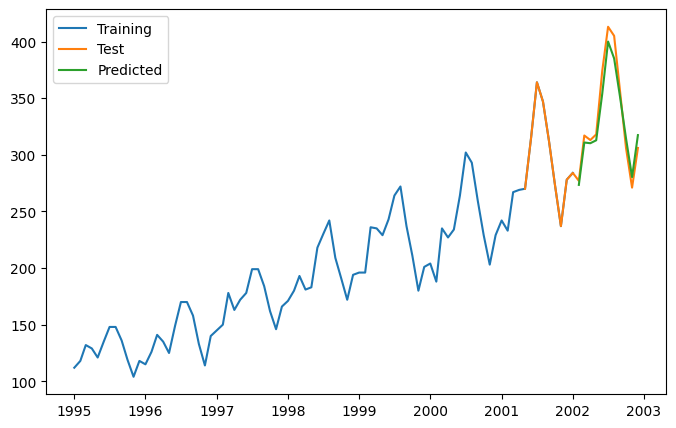

In [94]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

#PERSISTENCE/ BASE MODEL

In [95]:
# separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [96]:
# evaluate a persistence model and load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

<ipython-input-96-a0805dabf823>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
Name: 1, Length: 86, dtype: int64

In [97]:
# prepare data
X = train
X

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
Name: 1, Length: 86, dtype: int64

In [98]:
X = X.astype('float32')
X

0
1995-01-01    112.0
1995-02-01    118.0
1995-03-01    132.0
1995-04-01    129.0
1995-05-01    121.0
              ...  
2001-10-01    274.0
2001-11-01    237.0
2001-12-01    278.0
2002-01-01    284.0
2002-02-01    277.0
Name: 1, Length: 86, dtype: float32

In [99]:
train_size = int(len(X) * 0.50)
train_size

43

In [100]:
train, test = X[0:train_size], X[train_size:]

In [101]:
train

0
1995-01-01    112.0
1995-02-01    118.0
1995-03-01    132.0
1995-04-01    129.0
1995-05-01    121.0
1995-06-01    135.0
1995-07-01    148.0
1995-08-01    148.0
1995-09-01    136.0
1995-10-01    119.0
1995-11-01    104.0
1995-12-01    118.0
1996-01-01    115.0
1996-02-01    126.0
1996-03-01    141.0
1996-04-01    135.0
1996-05-01    125.0
1996-06-01    149.0
1996-07-01    170.0
1996-08-01    170.0
1996-09-01    158.0
1996-10-01    133.0
1996-11-01    114.0
1996-12-01    140.0
1997-01-01    145.0
1997-02-01    150.0
1997-03-01    178.0
1997-04-01    163.0
1997-05-01    172.0
1997-06-01    178.0
1997-07-01    199.0
1997-08-01    199.0
1997-09-01    184.0
1997-10-01    162.0
1997-11-01    146.0
1997-12-01    166.0
1998-01-01    171.0
1998-02-01    180.0
1998-03-01    193.0
1998-04-01    181.0
1998-05-01    183.0
1998-06-01    218.0
1998-07-01    230.0
Name: 1, dtype: float32

In [102]:
test

0
1998-08-01    242.0
1998-09-01    209.0
1998-10-01    191.0
1998-11-01    172.0
1998-12-01    194.0
1999-01-01    196.0
1999-02-01    196.0
1999-03-01    236.0
1999-04-01    235.0
1999-05-01    229.0
1999-06-01    243.0
1999-07-01    264.0
1999-08-01    272.0
1999-09-01    237.0
1999-10-01    211.0
1999-11-01    180.0
1999-12-01    201.0
2000-01-01    204.0
2000-02-01    188.0
2000-03-01    235.0
2000-04-01    227.0
2000-05-01    234.0
2000-06-01    264.0
2000-07-01    302.0
2000-08-01    293.0
2000-09-01    259.0
2000-10-01    229.0
2000-11-01    203.0
2000-12-01    229.0
2001-01-01    242.0
2001-02-01    233.0
2001-03-01    267.0
2001-04-01    269.0
2001-05-01    270.0
2001-06-01    315.0
2001-07-01    364.0
2001-08-01    347.0
2001-09-01    312.0
2001-10-01    274.0
2001-11-01    237.0
2001-12-01    278.0
2002-01-01    284.0
2002-02-01    277.0
Name: 1, dtype: float32

In [103]:
# walk-forward validation
history = [x for x in train]
import warnings
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0,
 230.0]

In [104]:
#Predictions

In [105]:
predictions = list()

In [106]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

In [107]:
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 25.698


#BUILDING MODEL USING OPTIMIZED VALUES

In [108]:
# save finalized model to file and load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,112
1995-01-01,
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
...,...
2001-10-01,274
2001-11-01,237
2001-12-01,278


In [109]:
# prepare data
X = train
X = X.astype('float32')

In [110]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2002-03-01    293.293657
2002-04-01    304.751340
2002-05-01    319.308829
2002-06-01    324.795740
2002-07-01    327.614940
2002-08-01    321.851861
2002-09-01    314.309097
2002-10-01    303.346045
2002-11-01    294.966596
2002-12-01    288.500136
2003-01-01    287.289986
2003-02-01    289.459260
Freq: MS, Name: predicted_mean, dtype: float64

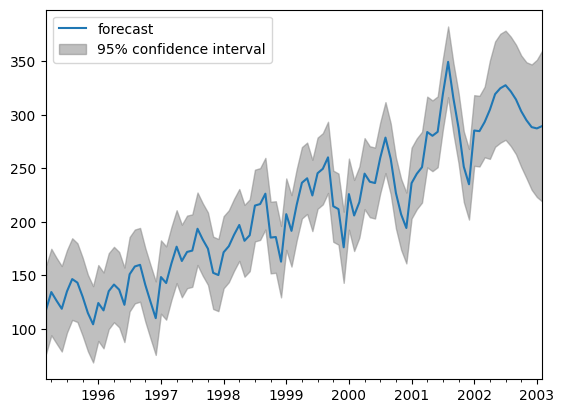

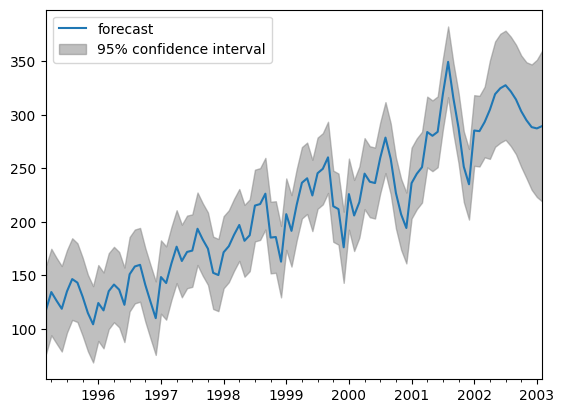

In [111]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

In [112]:
#Combine train and test data and build final model

In [113]:
# fit model
data=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

In [114]:
# prepare data
X = train
X = X.astype('float32')

In [115]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
forecast=model_fit.forecast(steps=12)
forecast

2002-03-01    293.293657
2002-04-01    304.751340
2002-05-01    319.308829
2002-06-01    324.795740
2002-07-01    327.614940
2002-08-01    321.851861
2002-09-01    314.309097
2002-10-01    303.346045
2002-11-01    294.966596
2002-12-01    288.500136
2003-01-01    287.289986
2003-02-01    289.459260
Freq: MS, Name: predicted_mean, dtype: float64

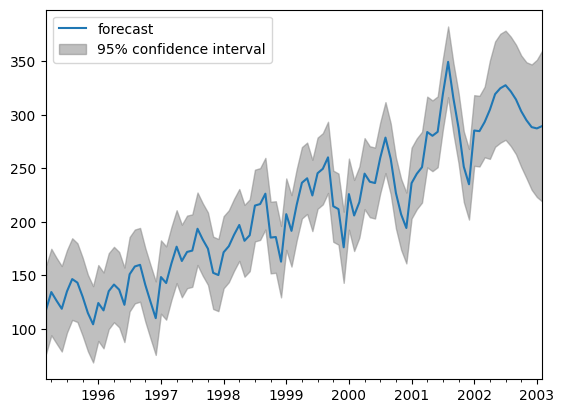

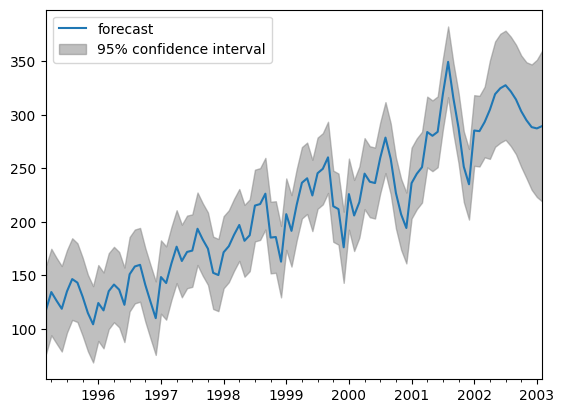

In [117]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)